# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [2]:
# 데이터 입력
E = np.zeros((6,6))
A = np.zeros((6,6))
Oi = np.zeros((6,6))
bet = np.zeros((6,6))
omg = np.zeros(6)
E[0][1] = 0.00609
E[0][2] = 0.01628
E[0][3] = 1.89879
E[0][4] = 4.05244
E[0][5] = 5.80061
E[1][2] = 0.01019
E[1][3] = 1.89270
E[1][4] = 4.04635
E[1][5] = 5.79452
E[2][3] = 1.88251
E[2][4] = 4.03616
E[2][5] = 5.78433
E[3][4] = 2.15365
E[3][5] = 3.90182
E[4][5] = 1.74817
A[1][0] = 2.08 * 10**(-6)
A[2][0] = 1.16 * 10**(-12)
A[3][0] = 5.35 * 10**(-7)
A[4][0] = 0
A[5][0] = 0
A[2][1] = 7.46 * 10**(-6)
A[3][1] = 1.01 * 10**(-3)
A[4][1] = 3.38 * 10**(-2)
A[5][1] = 4.80 * 10**(+1)
A[3][2] = 2.99 * 10**(-3)
A[4][2] = 1.51 * 10**(-4)
A[5][2] = 1.07 * 10**(+2)
A[4][3] = 1.12
A[5][3] = 0
A[5][4] = 0
Oi[1][0] = 0.408
Oi[2][0] = 0.272
Oi[3][0] = 0.2934
Oi[4][0] = 0.0326
Oi[5][0] = 0.1323
Oi[2][1] = 1.120
Oi[3][1] = 0.8803
Oi[4][1] = 0.0977
Oi[5][1] = 0.3968
Oi[3][2] = 1.4672
Oi[4][2] = 0.1628
Oi[5][2] = 0.6613
Oi[4][3] = 0.8338
Oi[5][3] = 0
Oi[5][4] = 0
bet[1][0] = 0.125
bet[2][0] = 0.21
bet[3][0] = 0.048
bet[4][0] = 0.050
bet[5][0] = 0.025
bet[2][1] = 0.17
bet[3][1] = 0.048
bet[4][1] = 0.050
bet[5][1] = 0.025
bet[3][2] = 0.048
bet[4][2] = 0.050
bet[5][2] = 0.025
bet[4][3] = -0.18
bet[5][3] = 0
bet[5][4] = 0
omg[5] = 1
omg[4] = 1
omg[3] = 5
omg[2] = 5
omg[1] = 3
omg[0] = 1

In [3]:
def f(ne, T): # n 값들을 구해주는 함수 정의
    t = T / 10000
    Omg = np.zeros((6,6)) # Omega 값을 주어진대로 구함
    for i in range(0,6):
        for j in range(0,6):
            Omg[j][i] = (t**(bet[j][i])) * Oi[j][i]

    q = np.zeros((6,6))
    for j in range(0,6): # q 값을 주어진대로 구함
        for i in range(0,6):
            if(j > i):
                q[j][i] = 8.629 * 10**(-8) * Omg[j][i] / (t**(0.5)) / omg[j]
            if(j > i):
                q[i][j] = omg[j] / omg[i] * q[j][i] * np.exp(-1.1605 * E[i][j] / t)

    C = np.zeros(5)
    for i in range(0,5): # 계수 행렬의 대각성분을 주어진대로 구함
        for k in range(0,6):
            if(k > i):
                C[i] = C[i] + ne * q[i][k]
            elif(k < i):
                C[i] = C[i] + A[i][k] + ne * q[i][k]  

    A_ = np.zeros((6,6))
    for i in range(0,6): # 계수 행렬에 원소를 넣어줌
        for k in range(0,6):
            if(i == 5):
                A_[i][k] = 1
            elif(k == i):
                A_[i][k] = (-1) * C[i]
            elif(k < i):
                A_[i][k] = ne * q[k][i]
            elif(k > i):
                A_[i][k] = ne * q[k][i] + A[k][i]
    
    
    
    
    B = np.array([0,0,0,0,0,1]) 
    x = np.linalg.solve(A_,B) # n 값들을 구함
    print(x) # 출력함

In [4]:
f(10, 10000) # ne = 10, T = 10000
f(10**5,10000) # ne = 10**5, T = 10000
f(10**4,5000) # ne = 10**4, T = 5000
f(10**4,20000) # ne = 10**4, T =20000

[7.57206634e-01 2.08874202e-01 3.39120994e-02 7.06361359e-06
 2.21572635e-10 8.80199627e-13]
[1.06627112e-01 3.22823048e-01 5.38254162e-01 3.22902435e-02
 5.42678473e-06 8.60777856e-09]
[1.14745280e-01 3.40912897e-01 5.43405313e-01 9.36505447e-04
 4.06140229e-09 1.49183699e-12]
[9.90327580e-02 3.25016207e-01 5.61438166e-01 1.45108441e-02
 2.00666804e-06 1.81481837e-08]


In [7]:
def plot(ne): # plot 함수 정의
    T  = 5000 # 처음 T값
    dT = 10 # dT 값
    T_list  = [] # plot 할 값을 저장할 곳
    R_list  = [] # plot 할 값을 저장할 곳
    while(T < 20000): # 끝값(T = 20000) 까지 실행
        t = T / 10000
        # 위와 동일한 방식으로 해당하는 T, ne 값에 대해서 n 값들을 뽑아냄
        Omg = np.zeros((6,6))
        for i in range(0,6):
            for j in range(0,6):
                Omg[j][i] = (t**(bet[j][i])) * Oi[j][i]

        q = np.zeros((6,6))
        for j in range(0,6):
            for i in range(0,6):
                if(j > i):
                    q[j][i] = 8.629 * 10**(-8) * Omg[j][i] / (t**(0.5)) / omg[j]
                if(j > i):
                    q[i][j] = omg[j] / omg[i] * q[j][i] * np.exp(-1.1605 * E[i][j] / t)

        C = np.zeros(5)
        for i in range(0,5):
            for k in range(0,6):
                if(k > i):
                    C[i] = C[i] + ne * q[i][k]
                elif(k < i):
                    C[i] = C[i] + A[i][k] + ne * q[i][k]  

        A_ = np.zeros((6,6))
        for i in range(0,6):
            for k in range(0,6):
                if(i == 5):
                    A_[i][k] = 1
                elif(k == i):
                    A_[i][k] = (-1) * C[i]
                elif(k < i):
                    A_[i][k] = ne * q[k][i]
                elif(k > i):
                    A_[i][k] = ne * q[k][i] + A[k][i]

        B = np.array([0,0,0,0,0,1])
        x = np.linalg.solve(A_,B)

        # 문제에 주어진 식(5) 번을 이용해서 T, ne 값에 대응되는 R을 구함
        
        R = x[3] / x[4] * A[3][2] / A[4][3] * 5755 / 6584
        R_list.append(R)
        T_list.append(T)
        T = T +dT
    return T_list,R_list # list 를 반환함

In [9]:
t10,r10 = plot(10) # ne 10 에 해당하는 값들
t1000,r1000 = plot(1000) # ne 1000 에 해당하는 값들
t100000,r100000 = plot(100000) # ne 100000 에 해당하는 값들

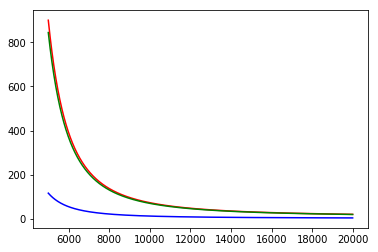

In [12]:
plt.plot(t10,r10,'r') # 빨간색 ne = 10
plt.plot(t1000,r1000,'g') # 초록색 ne =1000
plt.plot(t100000,r100000,'b') # 파란색 ne = 100000
# 가로축 T, 세로축 R